# Titanic - Machine Learning from Disaster

In [475]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

In [476]:
data_train = pd.read_csv('data/train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [477]:
y_train = data_train.pop('Survived')

In [478]:
data_test = pd.read_csv('data/test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Check data

In [479]:
data_test['test'] = True
data_train['test'] = False
data = pd.concat([data_train, data_test], axis=0)
data.isna().sum(axis=0)

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
test              0
dtype: int64

In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  test         1309 non-null   bool   
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 124.0+ KB


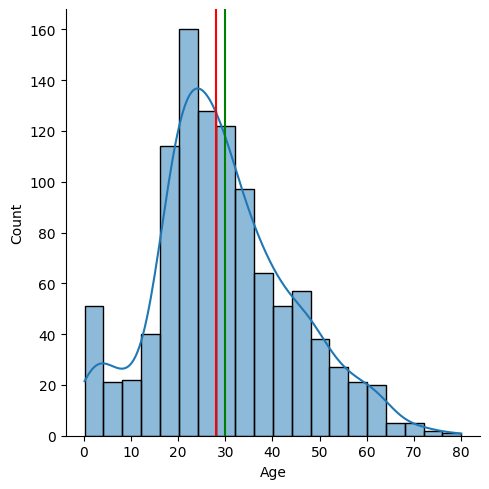

In [481]:
# graph age distribution
sns.displot(data['Age'].dropna(), kde=True, bins=20)
# add median and mean
plt.axvline(data['Age'].median(), color='red')
plt.axvline(data['Age'].mean(), color='green')
plt.show()

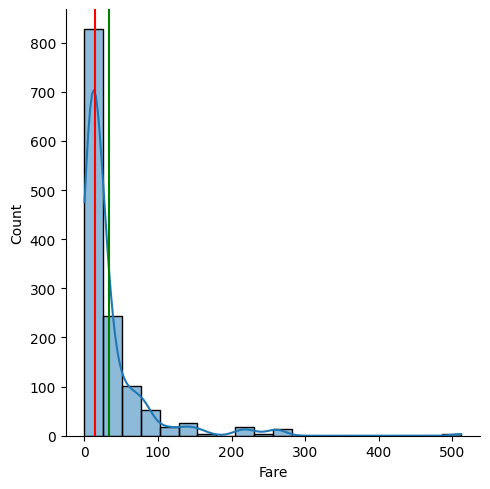

In [482]:
# fare distribution
sns.displot(data['Fare'].dropna(), kde=True, bins=20)
plt.axvline(data['Fare'].median(), color='red')
plt.axvline(data['Fare'].mean(), color='green')
plt.show()

In [483]:
# complete missing age with mean
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [484]:
# Embarked C = Cherbourg, Q = Queenstown, S = Southampton
# C = 1, Q = 2, S = 3 and na = 0
data['Embarked'] = data['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
data['Embarked'].fillna(0, inplace=True)
data['Embarked'].isna().sum(axis=0)

0

In [485]:
# ticket number
ticket = data['Ticket'].str.split(' ', expand=True)
ticket_number = ticket[1].where(~ticket[1].isna(), ticket[0])
ticket_number = ticket_number.replace('LINE', 0).replace('Basle', 0)
ticket_number = ticket_number.astype('float64')
data['Ticket number'] = ticket_number

In [486]:
# Sex
data['Sex'] = (data['Sex'] == 'male').astype(int)

In [487]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = data[~data['test']][features]
X_test = data[data['test']][features]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(3), int32(1), int64(3)
memory usage: 52.2 KB


In [488]:
# model with regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])


In [489]:
# train 
model.fit(X_train, y_train, epochs=3000)

Epoch 1/3000


28/28 [==============================] - 1s 884us/step - loss: 0.6923 - accuracy: 0.6420
Epoch 2/3000
28/28 [==============================] - 0s 852us/step - loss: 0.6278 - accuracy: 0.6824
Epoch 3/3000
28/28 [==============================] - 0s 852us/step - loss: 0.6380 - accuracy: 0.6599
Epoch 4/3000
28/28 [==============================] - 0s 815us/step - loss: 0.6063 - accuracy: 0.6970
Epoch 5/3000
28/28 [==============================] - 0s 852us/step - loss: 0.5715 - accuracy: 0.7160
Epoch 6/3000
28/28 [==============================] - 0s 815us/step - loss: 0.5894 - accuracy: 0.6992
Epoch 7/3000
28/28 [==============================] - 0s 852us/step - loss: 0.5719 - accuracy: 0.7183
Epoch 8/3000
28/28 [==============================] - 0s 778us/step - loss: 0.5408 - accuracy: 0.7284
Epoch 9/3000
28/28 [==============================] - 0s 778us/step - loss: 0.5776 - accuracy: 0.7239
Epoch 10/3000
28/28 [==============================] - 0s 852us/step - loss: 0.5279 - accuracy:

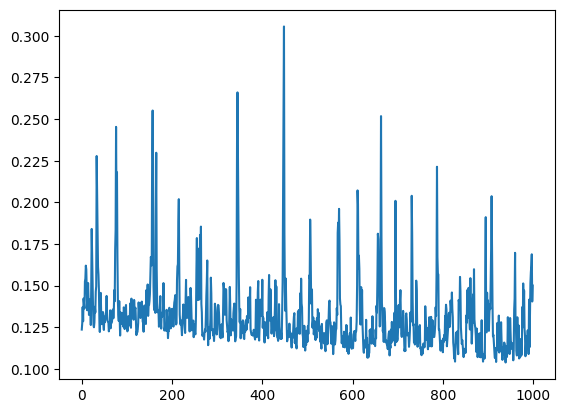

In [490]:
# graph loss
sns.lineplot(data=model.history.history['loss'][2000:])
plt.show()

In [491]:
# predict
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
y_pred.reshape(-1)

14/14 [==============================] - 0s 692us/step


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [492]:
# save to csv
submission = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': y_pred.reshape(-1)})
# File csv with 2 columns: PassengerId, Survived
submission.to_csv('data/submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [493]:
! pip install -U scikit-learn
# using random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
